# Client Churn Analysis Report

**Client Analyst Assignment**

**Objective**: Analyze churned client data to identify top reasons for churn and uncover patterns related to subscription plans, client owners, and payment behavior.

**Data Source**: Excel file containing client churn details.


In [104]:
# Step 1 : Read the Data

In [105]:


import pandas as pd

# Load the file from the `data` folder
file_path = 'data/churn_data.xlsx'
df = pd.read_excel(file_path)

# Show the top 5 rows to get the preview 
df.head()


,subscriptions.id,customers.company,brand name,subscriptions_plan_unit_price,client owner,No. of recurring invoices paid,Subscription start,Cancelled at,Reason 1,Reason 2,Reason 3
0,AzqbtwTQBPPY46TqL,Baella Stitch,baellastitch,4900.0,Tejashree,0,16-12-2022,15-01-2023,Not answering calls,NaN,NaN
1,Azqbx5TP8TaeaAP1,veganway,veganway,3500.0,Tejashree,1,2022-05-12 00:00:00,28-01-2023,Went for other partnership,NaN,NaN
2,AzqJRVTOfD5R0ofu,SOLVVE,solvve,3500.0,Tejashree,2,30-11-2022,30-01-2023,Went for other partnership,NaN,NaN
3,169mLgTLBavzU1qEg,RAASO CLEANING PRODUCTS PVT LTD,soviandtydi,7800.0,Tejashree,1,2023-05-04 00:00:00,15-07-2023,No dedicated person to handle dashboard,Better pricing,NaN
4,169mDMTKuWyLW1Urz,Homemade Love LLP,homemadelove,7800.0,Atiq,1,20-10-2022,23-01-2023,woocommerce problems,Bad product experience,Not answering calls


# Step 2 : Clean The Data


In [106]:
# Clean up column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Show the cleaned column names
df.columns


Index(['subscriptions.id', 'customers.company', 'brand_name',
       'subscriptions_plan_unit_price', 'client_owner',
       'no._of_recurring_invoices_paid', 'subscription_start', 'cancelled_at',
       'reason_1', 'reason_2', 'reason_3'],
      dtype='object')

## Reshaping Churn Reasons (Wide to Long Format)

Each customer could provide up to 3 reasons for churn: `reason_1`, `reason_2`, and `reason_3`.  
However, not all customers filled all three — some provided only 1 or 2.

To simplify the analysis, we transformed the data from a wide format (multiple columns for reasons) into a long format (one row per reason).  
This allows us to analyze and visualize churn reasons more effectively, with each reason treated as an individual feedback entry.

This step also keeps the related customer details (like company name, client owner, and plan price) alongside each churn reason.


In [107]:
# Step 1: Melt the data (flatten)
reasons_flat = pd.melt(
    df,
    id_vars=['customers.company', 'client_owner', 'subscriptions_plan_unit_price', 'no._of_recurring_invoices_paid'],
    value_vars=['reason_1', 'reason_2', 'reason_3'],
    var_name='reason_number',
    value_name='reason'
)

# Step 2: Drop NaNs
reasons_flat = reasons_flat.dropna(subset=['reason'])

# ✅ Step 3: Drop duplicates (same company giving same reason multiple times)
reasons_flat = reasons_flat.drop_duplicates(subset=['customers.company', 'reason'])

# Step 4: Reset index
reasons_flat = reasons_flat.reset_index(drop=True)

# Now count again
top_reasons = reasons_flat['reason'].value_counts().head(5)
top_reasons


reason
Not answering calls                        50
New features                               43
No dedicated person to handle dashboard    27
Dont want to focus on Whatsapp             21
Revamping Business                         20
Name: count, dtype: int64

# Step 4: Identify the Top 5 Reasons for Churn


In [108]:
# Count how many times each churn reason appears
top_reasons = reasons_flat['reason'].value_counts().head(5)

# Display the top 5 reasons
top_reasons

reason
Not answering calls                        50
New features                               43
No dedicated person to handle dashboard    27
Dont want to focus on Whatsapp             21
Revamping Business                         20
Name: count, dtype: int64

# Step 5: Visualize Top 5 Churn Reasons


## Bar chart


/tmp/ipykernel_247100/671171563.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


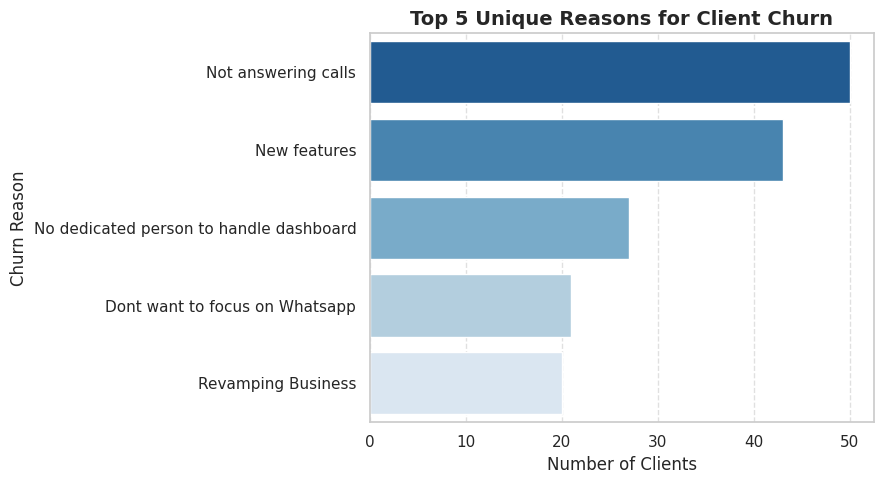

In [172]:
# Recalculate to ensure it's a proper Series
top_reasons = reasons_flat['reason'].value_counts().head(5)

# Turn into a DataFrame for seaborn compatibility
top_reasons_df = top_reasons.reset_index()
top_reasons_df.columns = ['reason', 'count']

# Now plot
plt.figure(figsize=(9, 5))
sns.barplot(
    data=top_reasons_df,
    x='count',
    y='reason',
    palette='Blues_r'
)

plt.title("Top 5 Unique Reasons for Client Churn", fontsize=14, weight='bold')
plt.xlabel("Number of Clients")
plt.ylabel("Churn Reason")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("top5_churn_bar.png", dpi=300)
plt.show()


## Pie chart

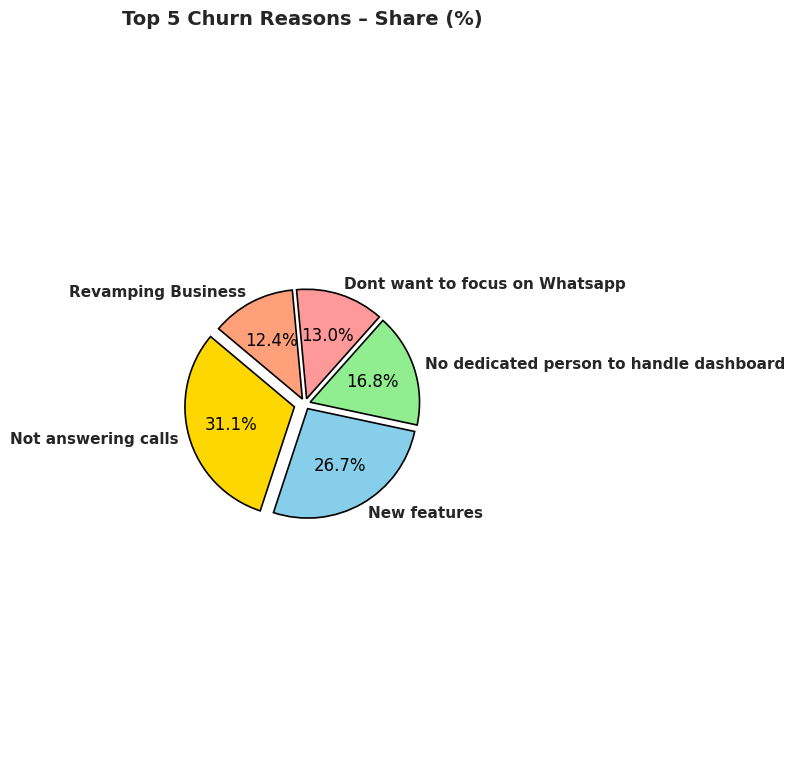

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reuse top reasons
top_reasons = reasons_flat['reason'].value_counts().head(5)

# Define colors manually or use a vivid palette
colors = ['#FFD700', '#87CEEB', '#90EE90', '#FF9999', '#FFA07A']  # Yellow, Sky Blue, Light Green, Pink, Peach

# Slightly pull out each slice
explode = [0.1 if i == 0 else 0.05 for i in range(len(top_reasons))]

# Create the pie chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    top_reasons.values,
    labels=top_reasons.index,
    autopct='%1.1f%%',
    startangle=140,
    explode=explode,
    colors=colors,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.2}
)

# Beautify labels
for text in texts:
    text.set_fontsize(11)
    text.set_weight('bold')

for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(12)

plt.title("Top 5 Churn Reasons – Share (%)", fontsize=14, weight='bold')
plt.axis('equal')
plt.tight_layout()
plt.savefig("top5_churn_pie_vibrant.png", dpi=300)
plt.show()


# Part 2 : Churn Analysis by Client Attributes

In [111]:
reasons_flat

,customers.company,client_owner,subscriptions_plan_unit_price,no._of_recurring_invoices_paid,reason_number,reason
0,Baella Stitch,Tejashree,4900.0,0,reason_1,Not answering calls
1,veganway,Tejashree,3500.0,1,reason_1,Went for other partnership
2,SOLVVE,Tejashree,3500.0,2,reason_1,Went for other partnership
3,RAASO CLEANING PRODUCTS PVT LTD,Tejashree,7800.0,1,reason_1,No dedicated person to handle dashboard
4,Homemade Love LLP,Atiq,7800.0,1,reason_1,woocommerce problems
...,...,...,...,...,...,...
321,Madhurya,Amitesh,999.0,0,reason_3,Dont want to focus on Whatsapp
322,optiminastic foods and beverages,Tejashree,7800.0,4,reason_3,Not using the Dashboard
323,Just Digital,Amitesh,3500.0,3,reason_3,Bad client
324,Tutto bene Delicatessen,Tejashree,5800.0,6,reason_3,Dont want to focus on Whatsapp


### Group all churned clients by their subscription plan and count how many reasons came from each plan

In [112]:
# Group the flattened reasons by plan
plan_churn = reasons_flat.groupby('subscriptions_plan_unit_price')['reason'].count().sort_values(ascending=False)

# Display the result
plan_churn


subscriptions_plan_unit_price
7800.0     191
4900.0      61
14999.0     14
2500.0      14
3500.0      13
999.0        9
6000.0       4
9800.0       4
5800.0       3
3000.0       3
23400.0      2
4400.0       2
20000.0      2
4000.0       1
12000.0      1
46800.0      1
Name: reason, dtype: int64

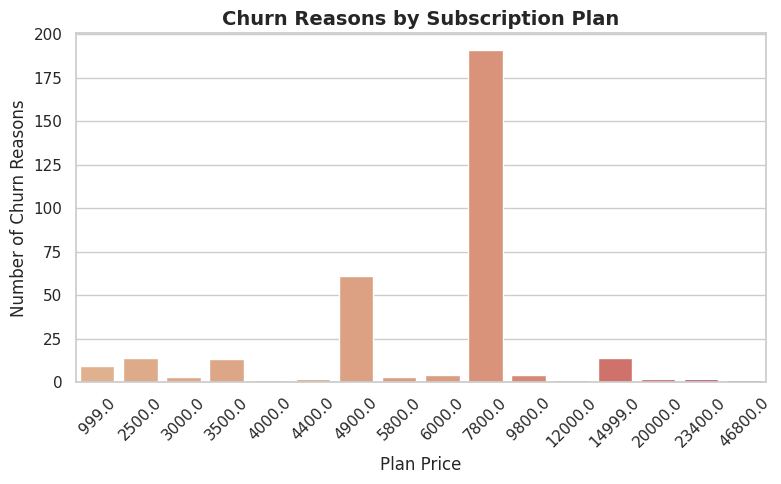

In [113]:
# Convert the Series to DataFrame for plotting
plan_churn_df = plan_churn.reset_index()
plan_churn_df.columns = ['plan_price', 'count']

# Plot without Seaborn hue warning
plt.figure(figsize=(8, 5))
sns.barplot(
    data=plan_churn_df,
    x='plan_price',
    y='count',
    palette='flare',
    hue='plan_price',
    legend=False  # disables repeated legend
)

plt.title("Churn Reasons by Subscription Plan", fontsize=14, weight='bold')
plt.xlabel("Plan Price", fontsize=12)
plt.ylabel("Number of Churn Reasons", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


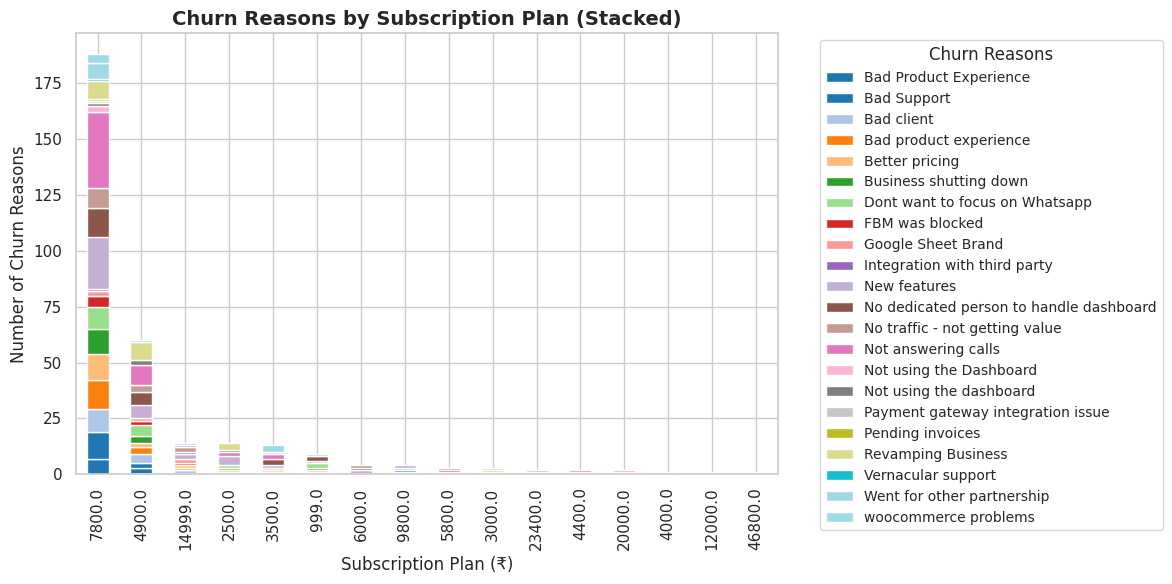

In [120]:
# Create a pivot table: reasons by plan
stacked = reasons_flat.pivot_table(
    index='subscriptions_plan_unit_price',
    columns='reason',
    values='customers.company',
    aggfunc='count',
    fill_value=0
)

# Sort by total reasons
stacked = stacked.loc[stacked.sum(axis=1).sort_values(ascending=False).index]

# Plot
stacked.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    colormap='tab20'
)

plt.title("Churn Reasons by Subscription Plan (Stacked)", fontsize=14, weight='bold')
plt.xlabel("Subscription Plan (₹)", fontsize=12)
plt.ylabel("Number of Churn Reasons", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', title='Churn Reasons')
plt.tight_layout()
plt.savefig("stacked_churn_by_plan.png", dpi=300)
plt.show()


### Group all Churn by Client Owner

In [114]:
# Group by client owner
owner_churn = reasons_flat.groupby('client_owner')['reason'].count().sort_values(ascending=False)

# Display result
owner_churn


client_owner
Tejashree    93
Amitesh      49
Vaishnavi    48
xavier       37
Devang       33
Mohammed     26
Divya        23
Atiq         15
Name: reason, dtype: int64

/tmp/ipykernel_247100/1526811057.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=owner_df, y='client_owner', x='count', palette='crest')


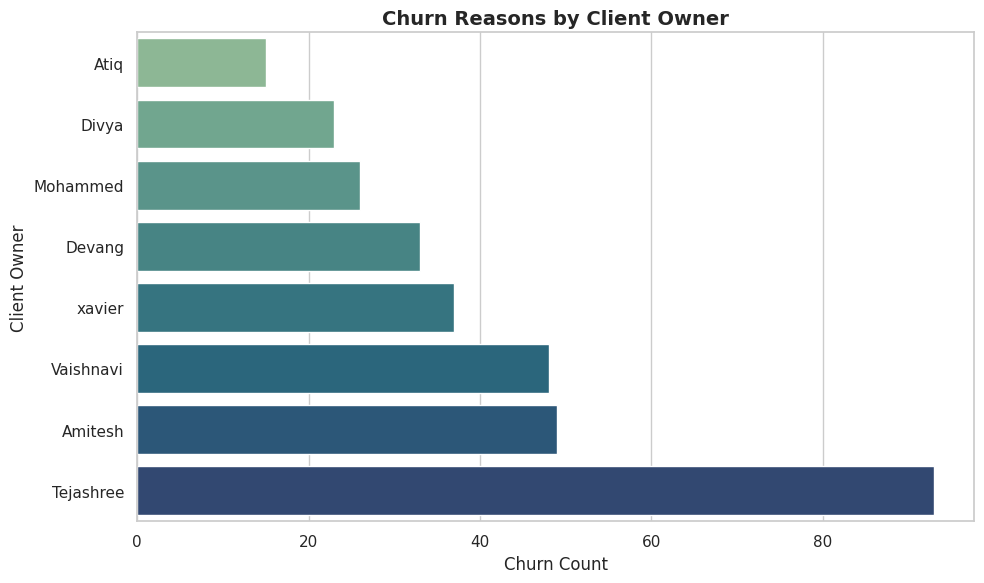

In [121]:
owner_churn = reasons_flat.groupby('client_owner')['reason'].count().sort_values()
owner_df = owner_churn.reset_index()
owner_df.columns = ['client_owner', 'count']

plt.figure(figsize=(10, 6))
sns.barplot(data=owner_df, y='client_owner', x='count', palette='crest')
plt.title("Churn Reasons by Client Owner", fontsize=14, weight='bold')
plt.xlabel("Churn Count")
plt.ylabel("Client Owner")
plt.tight_layout()
plt.savefig("owner_churn.png", dpi=300)
plt.show()


In [134]:
df_raw = df

# Step 1: Count unique companies (clients) per owner
total_clients = df_raw.groupby('client_owner')['customers.company'].nunique()

print("Total clients with companies \n")
total_clients


Total clients with companies 



client_owner
Amitesh      35
Atiq          9
Devang       25
Divya        17
Mohammed     20
Tejashree    58
Vaishnavi    30
xavier       28
Name: customers.company, dtype: int64

In [135]:

churn_clients = reasons_flat.groupby('client_owner')['customers.company'].nunique()
churn_clients

client_owner
Amitesh      33
Atiq          9
Devang       24
Divya        16
Mohammed     18
Tejashree    58
Vaishnavi    28
xavier       27
Name: customers.company, dtype: int64

In [136]:
owner_perf = pd.concat([total_clients, churn_clients], axis=1)
owner_perf

,customers.company,customers.company
client_owner,,
Amitesh,35,33
Atiq,9,9
Devang,25,24
Divya,17,16
Mohammed,20,18
Tejashree,58,58
Vaishnavi,30,28
xavier,28,27


In [142]:
# Step 1: Build the base DataFrame and assign correct names
owner_perf = pd.concat([total_clients, churn_clients], axis=1)
owner_perf.columns = ['total_clients', 'churned_clients']  

# Step 2: Now safely add churn rate
owner_perf['churn_rate'] = (owner_perf['churned_clients'] / owner_perf['total_clients']) * 100

# Step 3: Sort for better visibility
owner_perf = owner_perf.sort_values('churn_rate', ascending=True)
owner_perf


,total_clients,churned_clients,churn_rate
client_owner,,,
Mohammed,20,18,90.000000
Vaishnavi,30,28,93.333333
Divya,17,16,94.117647
Amitesh,35,33,94.285714
Devang,25,24,96.000000
xavier,28,27,96.428571
Atiq,9,9,100.000000
Tejashree,58,58,100.000000


/tmp/ipykernel_247100/1875211683.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


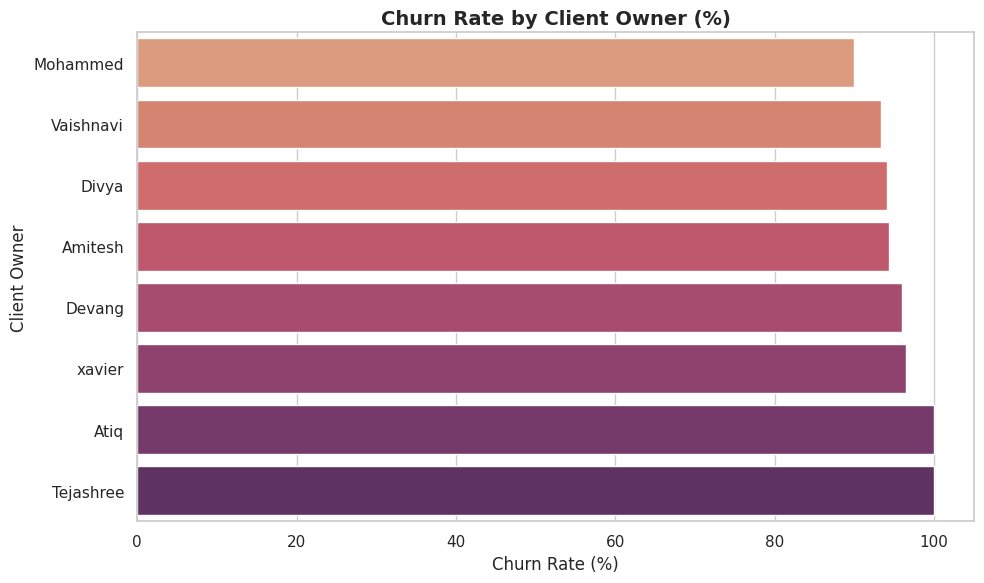

In [145]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=owner_perf.reset_index(),
    y='client_owner',
    x='churn_rate',
    palette='flare'
)

plt.title("Churn Rate by Client Owner (%)", fontsize=14, weight='bold')
plt.xlabel("Churn Rate (%)", fontsize=12)
plt.ylabel("Client Owner", fontsize=12)
plt.tight_layout()
plt.savefig("churn_rate_by_owner.png", dpi=300)
plt.show()


### Group clients by how many invoices they paid before churning, and count how many churn reasons came from each group

In [116]:
# Group by number of invoices paid
invoice_churn = reasons_flat.groupby('no._of_recurring_invoices_paid')['reason'].count().sort_index()

# Display result
invoice_churn


no._of_recurring_invoices_paid
0      20
1     122
2      69
3      39
4      21
5      19
6      12
7       3
8       5
9       8
10      7
12      1
Name: reason, dtype: int64

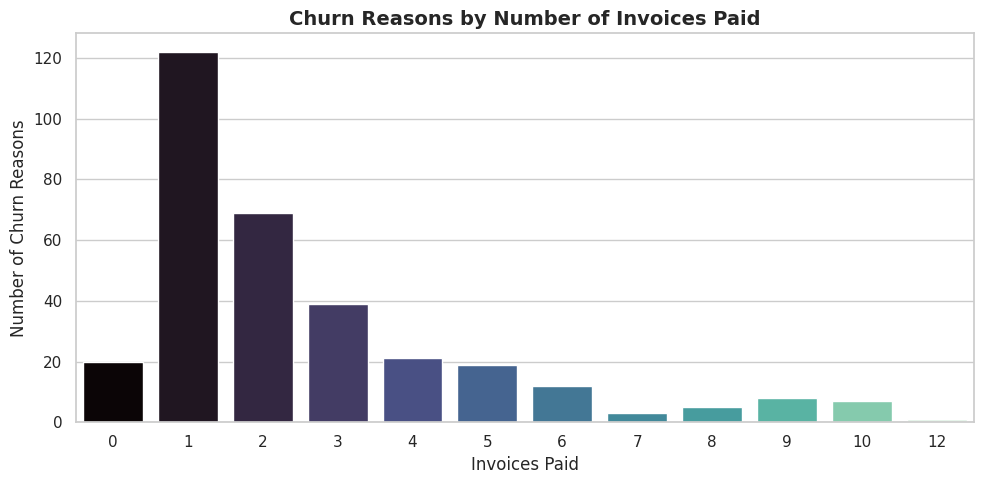

In [117]:
plt.figure(figsize=(10, 5))

sns.barplot(
    data=invoice_df,
    x='invoices_paid',
    y='count',
    hue='invoices_paid',
    palette='mako',
    legend=False        
)

plt.title("Churn Reasons by Number of Invoices Paid", fontsize=14, weight='bold')
plt.xlabel("Invoices Paid", fontsize=12)
plt.ylabel("Number of Churn Reasons", fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [147]:
invoice_churn = reasons_flat.groupby('no._of_recurring_invoices_paid')['customers.company'].nunique().sort_index()
invoice_df = invoice_churn.reset_index()
invoice_df.columns = ['invoices_paid', 'churned_clients']



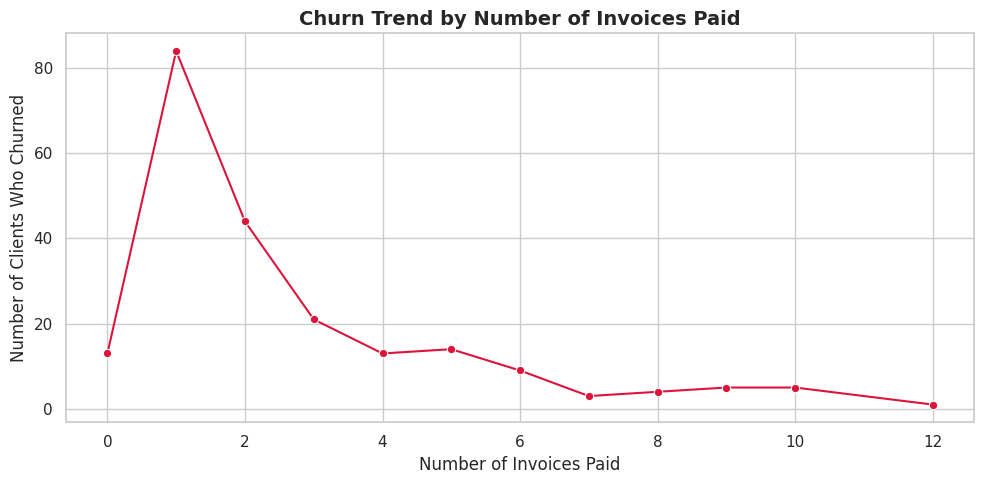

In [150]:
plt.figure(figsize=(10, 5))
sns.lineplot(
    data=invoice_df,
    x='invoices_paid',
    y='churned_clients',
    marker='o',
    color='crimson'
)

plt.title("Churn Trend by Number of Invoices Paid", fontsize=14, weight='bold')
plt.xlabel("Number of Invoices Paid", fontsize=12)
plt.ylabel("Number of Clients Who Churned", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig("churn_lifecycle_trend.png", dpi=300)
plt.show()


In [151]:
df_raw.columns.tolist()


['subscriptions.id',
 'customers.company',
 'brand_name',
 'subscriptions_plan_unit_price',
 'client_owner',
 'no._of_recurring_invoices_paid',
 'subscription_start',
 'cancelled_at',
 'reason_1',
 'reason_2',
 'reason_3']

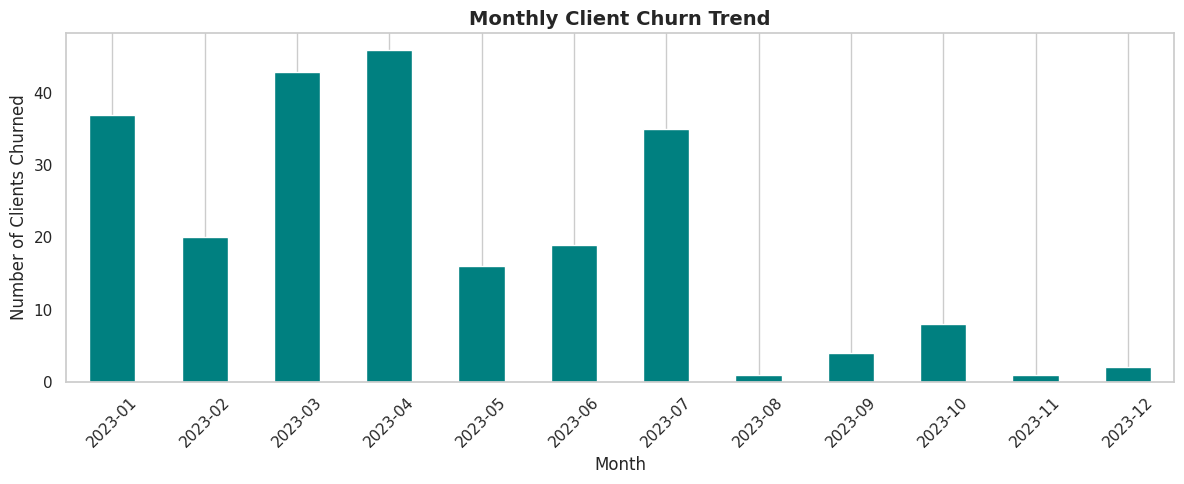

In [155]:
df_raw['cancelled_at'] = pd.to_datetime(df_raw['cancelled_at'])
df_raw['cancelled_month'] = df_raw['cancelled_at'].dt.to_period('M')
monthly_churn = df_raw['cancelled_month'].value_counts().sort_index()

plt.figure(figsize=(12, 5))
monthly_churn.plot(kind='bar', color='teal')

plt.title("Monthly Client Churn Trend", fontsize=14, weight='bold')
plt.xlabel("Month")
plt.ylabel("Number of Clients Churned")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig("monthly_churn_trend.png", dpi=300)
plt.show()


In [156]:
df_raw['subscription_start'] = pd.to_datetime(df_raw['subscription_start'])
df_raw['cancelled_at'] = pd.to_datetime(df_raw['cancelled_at'])
df_raw['days_active'] = (df_raw['cancelled_at'] - df_raw['subscription_start']).dt.days
df_raw['days_active'].describe()


/tmp/ipykernel_247100/2997651563.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_raw['subscription_start'] = pd.to_datetime(df_raw['subscription_start'])


count    232.000000
mean     175.219828
std      134.841382
min     -238.000000
25%       93.000000
50%      159.000000
75%      250.500000
max      575.000000
Name: days_active, dtype: float64

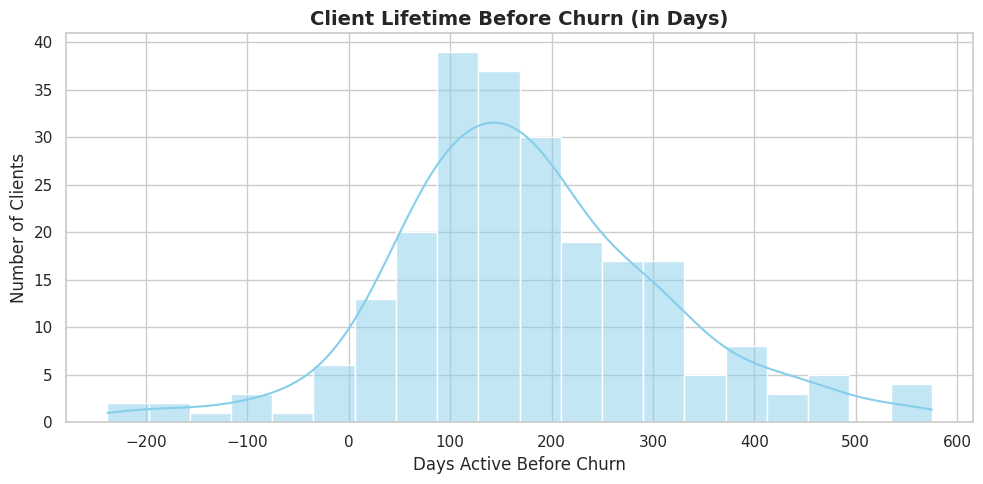

In [157]:
plt.figure(figsize=(10, 5))
sns.histplot(df_raw['days_active'], bins=20, kde=True, color='skyblue')

plt.title("Client Lifetime Before Churn (in Days)", fontsize=14, weight='bold')
plt.xlabel("Days Active Before Churn")
plt.ylabel("Number of Clients")
plt.grid(True)
plt.tight_layout()
plt.savefig("client_lifetime_distribution.png", dpi=300)
plt.show()


In [159]:
df_raw['subscription_start'] = pd.to_datetime(df_raw['subscription_start'])
df_raw['cancelled_at'] = pd.to_datetime(df_raw['cancelled_at'])
df_raw['days_active'] = (df_raw['cancelled_at'] - df_raw['subscription_start']).dt.days
df_raw['days_active'].describe()


count    232.000000
mean     175.219828
std      134.841382
min     -238.000000
25%       93.000000
50%      159.000000
75%      250.500000
max      575.000000
Name: days_active, dtype: float64

In [162]:
bins = [0, 3000, 6000, 9000, 15000, 50000]
labels = ['< ₹3k', '₹3k–₹6k', '₹6k–₹9k', '₹9k–₹15k', '> ₹15k']
reasons_flat['plan_group'] = pd.cut(reasons_flat['subscriptions_plan_unit_price'], bins=bins, labels=labels)


/tmp/ipykernel_247100/742268318.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heat_data = filtered_df.pivot_table(


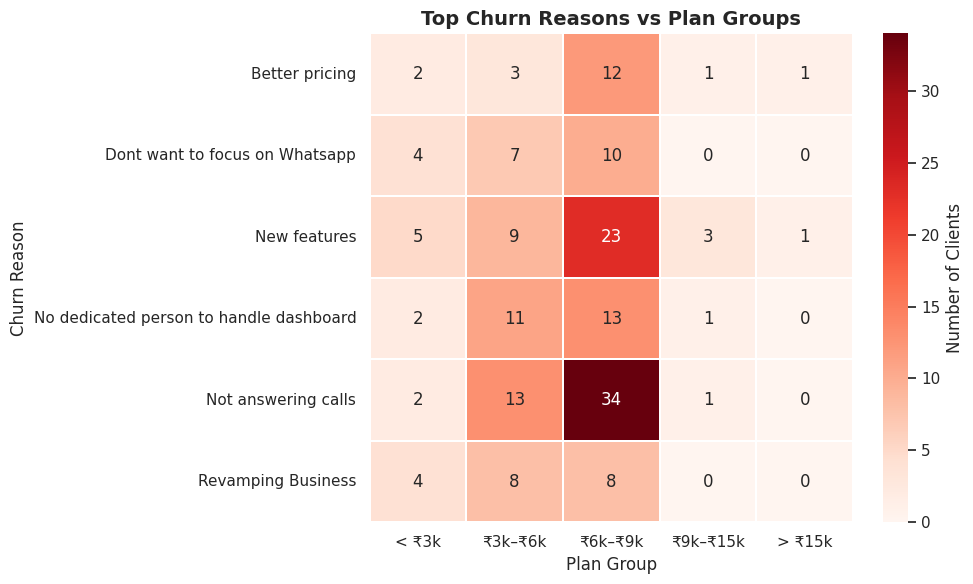

In [167]:
    top_reasons = reasons_flat['reason'].value_counts().head(6).index
filtered_df = reasons_flat[reasons_flat['reason'].isin(top_reasons)]
top_reasons = reasons_flat['reason'].value_counts().head(6).index
filtered_df = reasons_flat[reasons_flat['reason'].isin(top_reasons)]
heat_data = filtered_df.pivot_table(
    index='reason',
    columns='plan_group',
    values='customers.company',
    aggfunc='nunique',
    fill_value=0
)
plt.figure(figsize=(10, 6))
sns.heatmap(
    heat_data,
    cmap='Reds',
    annot=True,
    fmt='d',
    linewidths=0.2,
    linecolor='white',
    cbar_kws={'label': 'Number of Clients'}
)

plt.title("Top Churn Reasons vs Plan Groups", fontsize=14, weight='bold')
plt.xlabel("Plan Group")
plt.ylabel("Churn Reason")
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("clean_churn_reason_heatmap.png", dpi=300)
plt.show()
